In [1]:
import sys; sys.path.append('..')
import numpy as np
from math import pi, sqrt
import pyzx as zx
%config InlineBackend.figure_format = 'svg'

In [ ]:
qubits = 7
depth = 20
for i in range(500):
    if i%50 == 0:
        print(i)
    circ = zx.generate.cliffords(qubits,depth,t_gates=False)
    t = zx.tensor.tensorfy(circ)
    g = circ.copy()
    zx.simplify.clifford_simp(g,quiet=True)
    g.normalise()
    if g.depth() >=4: 
        print("Not fully normalised")
        continue
    zx.extract.clifford_extract(g,1,2)
    t2 = zx.tensor.tensorfy(g)
    if not zx.tensor.compare_tensors(t,t2):
        raise Exception("Not equal")
    del t
    del t2

0
Not fully normalised
Not fully normalised
Not fully normalised
50
Not fully normalised


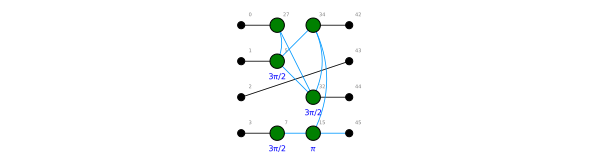

In [3]:
zx.draw(g,labels=True)

In [7]:
gg = g
g = gg.copy()

In [10]:
def prepare(g, left_row, right_row):
    qubits = g.qubit_count()
    qleft = [v for v in g.vertices() if g.row(v)==left_row]
    qright= [v for v in g.vertices() if g.row(v)==right_row]
    qleft.sort(key=g.qubit)
    qright.sort(key=g.qubit)
    for q in range(qubits):
        no_left = False
        if len(qleft) <= q or g.qubit(qleft[q]) != q: #missing vertex
            vert = max((v for v in g.vertices() if g.qubit(v)==q and g.row(v)<left_row), key=g.row)
            neigh = [n for n in g.neighbours(vert) if g.qubit(n)==q and g.row(n)>=right_row]
            if neigh:
                conn = min(neigh,key=g.row)
            else:
                neigh = [n for n in g.neighbours(vert) if g.row(n)==right_row]
                if len(neigh) > 1: raise TypeError("Too many neighbours")
                conn = neigh[0]
            e = g.edge(vert, conn)
            t = g.edge_type(e)
            g.remove_edge(e)
            v1 = g.add_vertex(1,q,left_row)
            g.add_edge((vert,v1),3-t)
            g.add_edge((v1,conn), 2)
            qleft.insert(q,v1)
            no_left = True
        else:
            v1 = qleft[q]
        if len(qright) <= q or g.qubit(qright[q]) != q: #missing vertex
            if no_left: vert = conn
            else: vert = min((v for v in g.vertices() if g.qubit(v)==q and g.row(v)>right_row), key=g.row)
            neigh = [n for n in g.neighbours(vert) if g.qubit(n)==q and g.row(n)<=left_row]
            if neigh:
                conn2 = max(neigh,key=g.row)
                if v1 != conn2: raise TypeError("vertices mismatching")
            else:
                neigh = [n for n in g.neighbours(vert) if g.row(n)==left_row]
                if len(neigh) > 1: raise TypeError("Too many neighbours")
                conn2 = neigh[0]
            e = g.edge(conn2,vert)
            t = g.edge_type(e)
            g.remove_edge(e)
            v2 = g.add_vertex(1,q,right_row)
            g.add_edge((conn2,v2),2)
            g.add_edge((v2,vert),3-t)
            qright.insert(q,v2)

In [11]:
prepare(g,1,2)

2


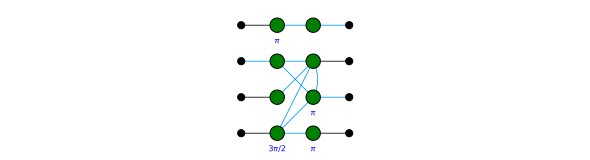

In [12]:
zx.draw(g)

In [22]:
circ = zx.generate.cliffords(2,15,t_gates=False)

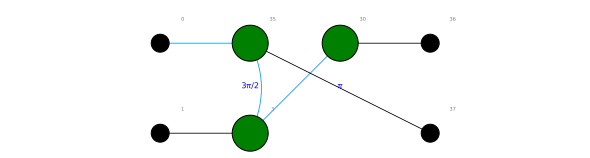

In [25]:
g = circ.copy()
zx.simplify.clifford_simp(g,quiet=True)
zx.extract.normalise(g)
t = zx.tensor.tensorfy(g)
#zx.extract.clifford_extract(g,1,2)
#t2 = zx.tensor.tensorfy(g)
zx.draw(g,labels=True)

In [26]:
t

array([[[[ 0.70710678+0.j        , -0.        -0.70710678j],
         [ 0.        +0.j        ,  0.        +0.j        ]],

        [[ 0.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]]],


       [[[ 0.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]],

        [[ 0.70710678+0.j        , -0.        -0.70710678j],
         [ 0.        +0.j        ,  0.        +0.j        ]]]])

In [21]:
t2

array([[[[[[[[ 0.     -0.j     ,  0.     +0.j     ],
             [ 0.     +0.j     ,  0.     +0.j     ]],

            [[ 0.     +0.03125j, -0.03125+0.j     ],
             [-0.03125+0.j     ,  0.     +0.03125j]]],


           [[[-0.03125+0.j     ,  0.     +0.03125j],
             [-0.     -0.03125j,  0.03125-0.j     ]],

            [[ 0.     -0.j     ,  0.     +0.j     ],
             [ 0.     +0.j     , -0.     +0.j     ]]]],



          [[[[ 0.     +0.j     ,  0.     +0.j     ],
             [ 0.     +0.j     ,  0.     +0.j     ]],

            [[ 0.     +0.j     ,  0.     +0.j     ],
             [ 0.     +0.j     ,  0.     +0.j     ]]],


           [[[ 0.     +0.j     ,  0.     +0.j     ],
             [ 0.     +0.j     ,  0.     +0.j     ]],

            [[ 0.     +0.j     ,  0.     +0.j     ],
             [ 0.     +0.j     ,  0.     +0.j     ]]]]],




         [[[[[ 0.     +0.j     ,  0.     +0.j     ],
             [ 0.     +0.j     ,  0.     +0.j     ]],

            [[

In [ ]:
t = tensorfy(circ)
t

In [ ]:
t = tensorfy(circ)
g = circ.copy()

zx.simplify.clifford_simp(g)
#g.set_phase(3,0)
t2 = tensorfy(g)
zx.draw(g,labels=True)
#np.allclose(t,t2)
#print(t,"\n\n", t2)

In [ ]:
compare_tensors(t,t2)

In [ ]:
t2

In [ ]:
zx.draw(g.adjoint(),labels=True)
tadj = tensorfy(g.adjoint())
tadj
#np.tensordot(t2,tadj,axes=([2,3],[0,1]))
#id2 = Z_to_tensor(2,0)
#np.transpose(np.tensordot(id2,id2,axes=0),[0,2,1,3])

In [ ]:
#tensor[1,1,0,1]
np.transpose(tensor, [3,2,0,1])
#np.transpose(tensor, [0,3,2,1])

In [ ]:
id2 = Z_to_tensor(2,0)
z = Z_to_tensor(3,0)
print(z)
x = X_to_tensor(3,0)
print(x)
x2 = X_to_tensor(4,0)
a = np.tensordot(id2,z,axes=0)
cnot = np.tensordot(a,x,axes=([1,4],[2,0]))
cnot
#np.transpose(cnot,[0,1,3,2])
np.transpose(np.tensordot(z,x,(0,0)),[0,2,1,3])

In [ ]:
i = 10
b = [int(j) for j in bin(i)[2:]]
b

In [ ]:
l = [1,2,3]
l.count(2)

In [ ]:
id2 = [[1,0],[0,1]]
a = [[[1,0],[0,0]],[[0,0],[0,1]]]
b = [[[1,0],[0,1]],[[0,1],[1,0]]]
print(np.einsum("klm,iln->kimn",a,b))
#print(np.tensordot(a,b, axes=(0,0)))
c = np.tensordot(id2, a, axes=0)
cnot = np.tensordot(c,b,axes=([1,3],[1,0]))
#print(cnot)
cnot2 = np.tensordot(id2,np.tensordot(a,b,axes=(1,0)),axes=(1,0))
#print(cnot2)
np.einsum("ij,klm,jln->ikmn",id2,a,b)